In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [7]:
df=pd.read_csv('D:/DataScience file/bank+marketing/bank/bank-full.csv', delimiter=';')
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
loan_count=df['y'].value_counts()
loan_count

y
no     39922
yes     5289
Name: count, dtype: int64

In [17]:
groupby=df.groupby(['age','marital'])['loan'].value_counts().reset_index()
data_table=pd.DataFrame(groupby)
data_table

age   marital loan  count
0     18    single   no     12
1     19    single   no     35
2     20   married   no      2
3     20   married  yes      1
4     20    single   no     45
..   ...       ...  ...    ...
319   92   married   no      2
320   93   married   no      2
321   94  divorced   no      1
322   95  divorced   no      1
323   95   married   no      1

[324 rows x 4 columns]

In [19]:
df.isnull().sum()
df.dropna(inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # Convert target to 0/1
features_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
df = pd.get_dummies(df, columns=features_columns)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#          Predicted No   Predicted Yes
# Actual No     TN (True Negative)   FP (False Positive)
# Actual Yes    FN (False Negative)  TP (True Positive)

Accuracy: 0.8924179421392551
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     19945
           1       0.56      0.41      0.47      2661

    accuracy                           0.89     22606
   macro avg       0.74      0.68      0.71     22606
weighted avg       0.88      0.89      0.88     22606

Confusion Matrix:
 [[19092   853]
 [ 1579  1082]]


In [25]:
df

age  balance  duration  campaign  pdays  previous  y  job_admin.  \
0       58     2143       261         1     -1         0  0       False   
1       44       29       151         1     -1         0  0       False   
2       33        2        76         1     -1         0  0       False   
3       47     1506        92         1     -1         0  0       False   
4       33        1       198         1     -1         0  0       False   
...    ...      ...       ...       ...    ...       ... ..         ...   
45206   51      825       977         3     -1         0  1       False   
45207   71     1729       456         2     -1         0  1       False   
45208   72     5715      1127         5    184         3  1       False   
45209   57      668       508         4     -1         0  0       False   
45210   37     2971       361         2    188        11  0       False   

       job_blue-collar  job_entrepreneur  ...  day_26  day_27  day_28  day_29  \
0                False             False  ...   False   False   False   False   
1                False             False  ...   False   False   False   False   
2                False              True  ...   False   False   False   False   
3                 True             False  ...   False   False   False   False   
4                False             False  ...   False   False   False   False   
...                ...               ...  ...     ...     ...     ...     ...   
45206            False             False  ...   False   False   False   False   
45207            False             False  ...   False   False   False   False   
45208            False             False  ...   False   False   False   False   
45209             True             False  ...   False   False   False   False   
45210            False              True  ...   False   False   False   False   

       day_30  day_31  poutcome_failure  poutcome_other  poutcome_success  \
0       False   False             False           False             False   
1       False   False             False           False             False   
2       False   False             False           False             False   
3       False   False             False           False             False   
4       False   False             False           False             False   
...       ...     ...               ...             ...               ...   
45206   False   False             False           False             False   
45207   False   False             False           False             False   
45208   False   False             False           False              True   
45209   False   False             False           False             False   
45210   False   False             False            True             False   

       poutcome_unknown  
0                  True  
1                  True  
2                  True  
3                  True  
4                  True  
...                 ...  
45206              True  
45207              True  
45208             False  
45209              True  
45210             False  

[45211 rows x 82 columns]

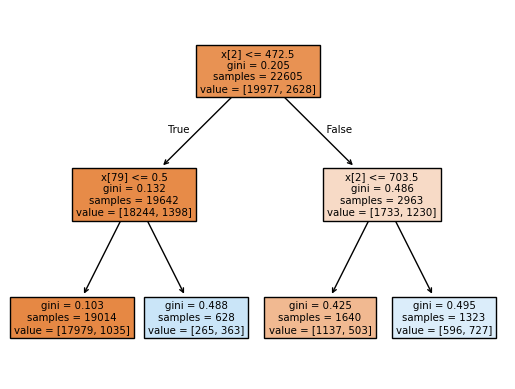

<Figure size 640x480 with 0 Axes>

In [27]:
# from sklearn.tree import plot_tree
tree.plot_tree(clf,filled=True)
# plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
plt.savefig("decision_tree.png")